In [14]:
# import libaraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
df = pd.read_csv('data.csv')
print(df)

      Account Name               Date & Time     Activity Details  \
0   Dining Dollars  January 25, 2025,11:53AM  Sim - GibsonDining1   
1   Dining Dollars   January 24, 2025,9:54AM           Sim - SBX1   
2   Dining Dollars   January 24, 2025,8:22AM  Sim - GibsonDining1   
3   Dining Dollars   January 23, 2025,6:08PM  Sim - GibsonDining1   
4   Dining Dollars  January 23, 2025,10:53AM           Sim - SBX1   
5   Dining Dollars   January 23, 2025,7:38AM  Sim - GibsonDining1   
6   Dining Dollars  January 22, 2025,10:32AM           Sim - SBX1   
7   Dining Dollars   January 22, 2025,8:16AM  Sim - GibsonDining1   
8   Dining Dollars   January 21, 2025,6:11PM  Sim - GibsonDining1   
9   Dining Dollars  January 21, 2025,12:03PM      Sim - Gorillas3   
10  Dining Dollars   January 21, 2025,9:06AM           Sim - SBX1   

    Amount ($ / Meals)  
0                 9.50  
1                 2.65  
2                 9.00  
3                 1.00  
4                 2.65  
5                 9.0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Account Name        11 non-null     object 
 1   Date & Time         11 non-null     object 
 2   Activity Details    11 non-null     object 
 3   Amount ($ / Meals)  11 non-null     float64
dtypes: float64(1), object(3)
memory usage: 480.0+ bytes


#### Numerical Features
- Amount ($ / Meals)
- Date & Time

#### Categorical Features
- Account Name
- Activity Details

In [17]:
df.isnull().sum()

Account Name          0
Date & Time           0
Activity Details      0
Amount ($ / Meals)    0
dtype: int64

In [18]:
df['Amount ($ / Meals)'].mean()

5.898181818181819

In [19]:
df['Activity Details'].value_counts()

Activity Details
Sim - GibsonDining1    6
Sim - SBX1             4
Sim - Gorillas3        1
Name: count, dtype: int64

In [20]:
df.describe()

,Amount ($ / Meals)
count,11.000000
mean,5.898182
std,3.505914
min,1.000000
25%,2.650000
50%,7.280000
75%,9.000000
max,9.500000


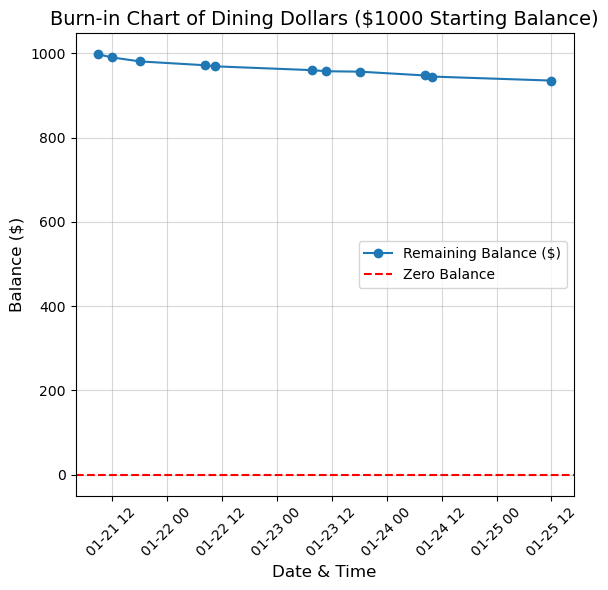

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Data
data = {
    "Account Name": ["Dining Dollars"] * 11,
    "Date & Time": [
        "January 25, 2025,11:53AM",
        "January 24, 2025,9:54AM",
        "January 24, 2025,8:22AM",
        "January 23, 2025,6:08PM",
        "January 23, 2025,10:53AM",
        "January 23, 2025,7:38AM",
        "January 22, 2025,10:32AM",
        "January 22, 2025,8:16AM",
        "January 21, 2025,6:11PM",
        "January 21, 2025,12:03PM",
        "January 21, 2025,9:06AM",
    ],
    "Activity Details": [
        "Sim - GibsonDining1",
        "Sim - SBX1",
        "Sim - GibsonDining1",
        "Sim - GibsonDining1",
        "Sim - SBX1",
        "Sim - GibsonDining1",
        "Sim - SBX1",
        "Sim - GibsonDining1",
        "Sim - GibsonDining1",
        "Sim - Gorillas3",
        "Sim - SBX1",
    ],
    "Amount ($ / Meals)": [9.50, 2.65, 9.00, 1.00, 2.65, 9.00, 2.65, 9.00, 9.50, 7.28, 2.65],
}

# Load data into a DataFrame
df = pd.DataFrame(data)

# Convert "Date & Time" to datetime
df["Date & Time"] = pd.to_datetime(df["Date & Time"], format="%B %d, %Y,%I:%M%p")

# Sort by date and time
df = df.sort_values(by="Date & Time")

# Calculate cumulative spending
df["Cumulative Spending"] = df["Amount ($ / Meals)"].cumsum()
df["Remaining Balance"] = 1000 - df["Cumulative Spending"]

# Plot burn-in chart
plt.figure(figsize=(6, 6))
plt.plot(df["Date & Time"], df["Remaining Balance"], marker="o", label="Remaining Balance ($)")
plt.axhline(y=0, color="red", linestyle="--", label="Zero Balance")
plt.title("Burn-in Chart of Dining Dollars ($1000 Starting Balance)", fontsize=14)
plt.xlabel("Date & Time", fontsize=12)
plt.ylabel("Balance ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


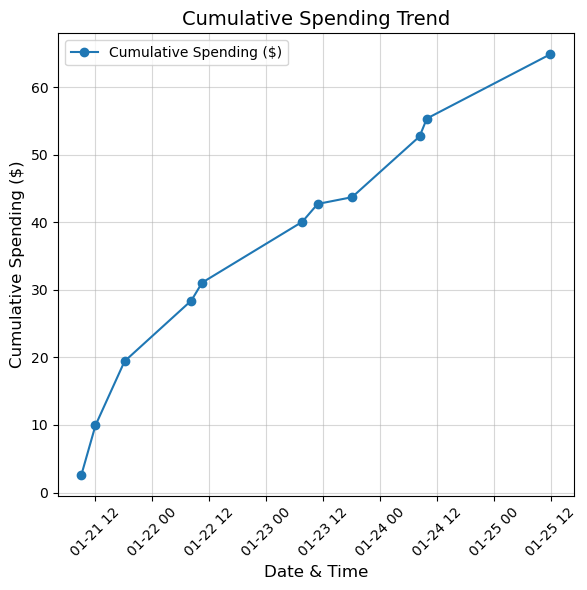

In [24]:
# Convert "Date & Time" to datetime
df["Date & Time"] = pd.to_datetime(df["Date & Time"], format="%B %d, %Y,%I:%M%p")

# Sort by date and time
df = df.sort_values(by="Date & Time")

# Calculate cumulative spending
df["Cumulative Spending"] = df["Amount ($ / Meals)"].cumsum()

# Plot trend graph
plt.figure(figsize=(6, 6))
plt.plot(df["Date & Time"], df["Cumulative Spending"], marker="o", label="Cumulative Spending ($)")
plt.title("Cumulative Spending Trend", fontsize=14)
plt.xlabel("Date & Time", fontsize=12)
plt.ylabel("Cumulative Spending ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()